# 距離の色々な違いについて考察する

20190607　　

ガウス分布の距離の違い

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from pylab import rcParams

In [154]:
def mynorm(v):
    return np.linalg.norm(v)

def euclidean(y1,  y2):
    return mynorm(y1 - y2)

def manhattan(y1,  y2):
    return np.sum(np.abs(y1 - y2))


def chi_squre(y1, y2):
    def cs(i):
        return  (y1[i] - y2[i]) ** 2 / (y1[i] + y2[i])
    return np.sum([ cs(i)  for i in range(len(y1))])

def cosine(y1, y2):
    return (y1 @ y2 / (mynorm(y1) * mynorm(y1) ))

def histgram_intersection(y1, y2):
    def hi(i):
        return  min(y1[i],y2[i])
    return np.sum([ hi(i)  for i in range(len(y1))])

def bhattacharyya(y1, y2):
    def b(i):
        return  np.sqrt(y1[i] * y2[i])
    return -np.log(np.sum([ b(i)  for i in range(len(y1))]))

def kullback(y1, y2):
    def kl(i):
        return  y1[i] * np.log(y1[i] / y2[i])
    return np.sum([ kl(i)  for i in range(len(y1))])
def kullback12(y1, y2):
    return kullback(y1, y2)
def kullback21(y1, y2):
    return kullback(y2, y1)

def js(y1, y2):
    return kullback(y1, y2) / 2 + kullback(y2, y1) / 2


def calc_dists(y1, y2):
    
    funcs = {}
    funcs["euclidean"  ] = euclidean
    funcs["manhattan"] = manhattan
    funcs["chi_squre"  ] = chi_squre
    funcs["cosine"        ] = cosine
    funcs["histgram_intersection"] = histgram_intersection
    funcs["bhattacharyya"] = bhattacharyya
    funcs["kullback12"] = kullback12
    funcs["kullback21"] = kullback21
    funcs["js"] = js

    ds = {}

    for key in funcs.keys():
        ds[key] = funcs[key](y1, y2)
    return ds


## 1.値の移動に伴う距離の差

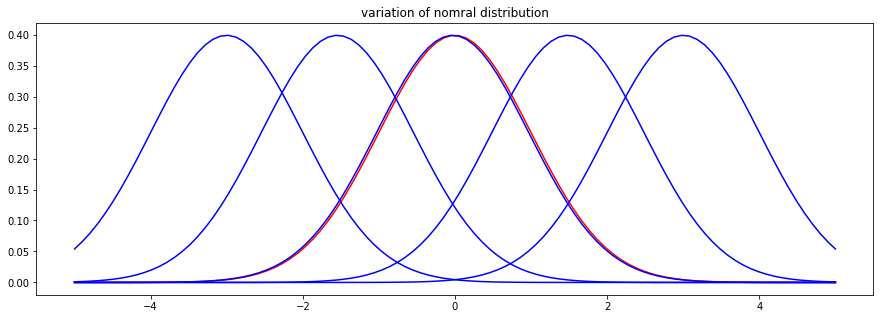

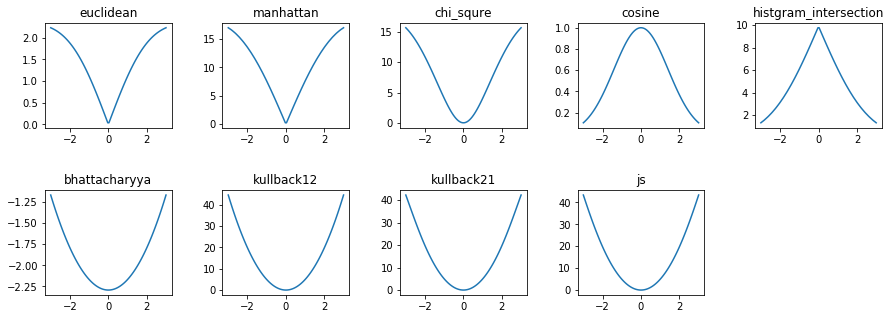

In [155]:
xs = np.linspace(-5.0, 5.0, 100)
y1 = norm.pdf(x=xs, loc=0, scale=1)

sl = 100
shift_vals = np.linspace(-3, 3, sl)
show_vals = shift_vals[np.linspace(0,sl - 1,5).astype(np.int)]
dists = {}

rcParams["figure.figsize"] = (15,5)
plt.plot(xs, y1,color = "r")
for si, shift_val in enumerate(shift_vals):
    y2 = norm.pdf(x=xs, loc=shift_val, scale=1)
    dist = calc_dists(y1, y2)
    for key in dist.keys():
        if key not in dists.keys():
            dists[key] = []
        dists[key].append(dist[key])
    if shift_val in show_vals:
        plt.plot(xs, y2,color = "b")
plt.title("variation of nomral distribution")
plt.show()

plt.pause(0.1)
rcParams["figure.figsize"] = (15,5)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for ki, key in enumerate(dists.keys()):
    vals = dists[key]
    plt.subplot(2,5,ki + 1)
    plt.plot(shift_vals, vals)
    plt.title(key)
plt.show()

## 2.分散の変化に伴う差

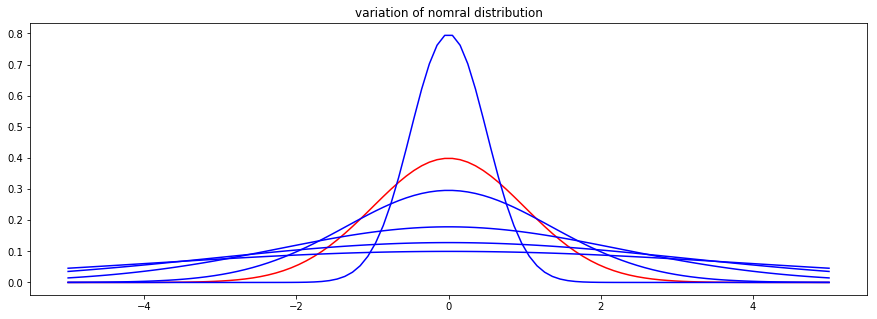

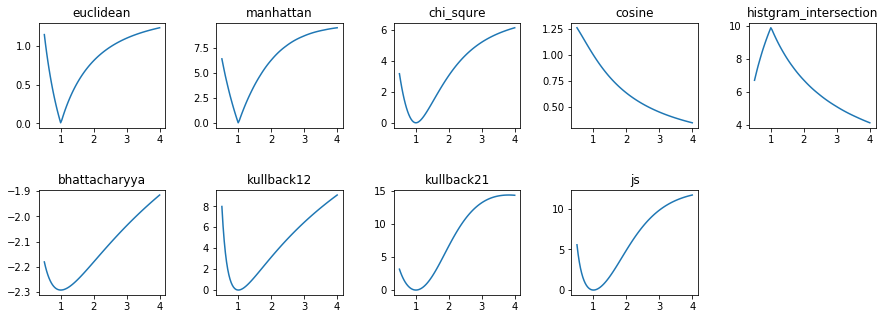

In [156]:
xs = np.linspace(-5.0, 5.0, 100)
y1 = norm.pdf(x=xs, loc=0, scale=1)

sl = 100
shift_vals = np.linspace(0.5, 4, sl)
show_vals = shift_vals[np.linspace(0,sl - 1,5).astype(np.int)]
dists = {}

rcParams["figure.figsize"] = (15,5)
plt.plot(xs, y1,color = "r")
for si, shift_val in enumerate(shift_vals):
    y2 = norm.pdf(x=xs, loc=0, scale=shift_val)
    dist = calc_dists(y1, y2)
    for key in dist.keys():
        if key not in dists.keys():
            dists[key] = []
        dists[key].append(dist[key])
    if shift_val in show_vals:
        plt.plot(xs, y2,color = "b")
plt.title("variation of nomral distribution")
plt.show()

plt.pause(0.1)
rcParams["figure.figsize"] = (15,5)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for ki, key in enumerate(dists.keys()):
    vals = dists[key]
    plt.subplot(2,5,ki + 1)
    plt.plot(shift_vals, vals)
    plt.title(key)
plt.show()


## 3.ノイズへの頑健さ

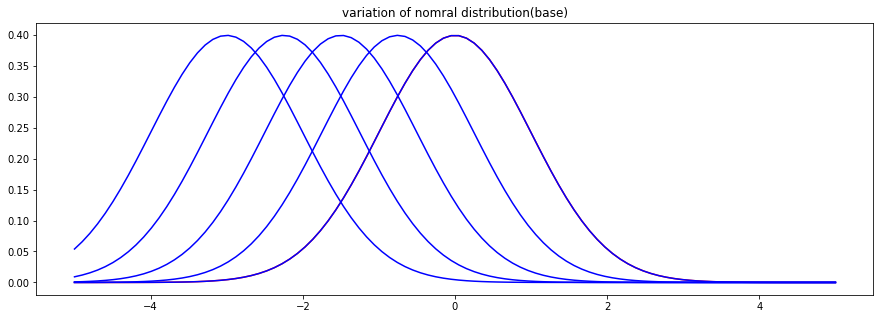

/Users/masashiueda/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: This function is deprecated. Please call randint(1, 99 + 1) instead


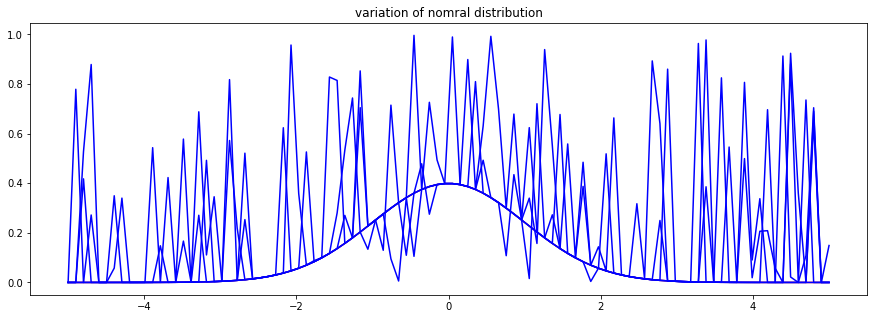

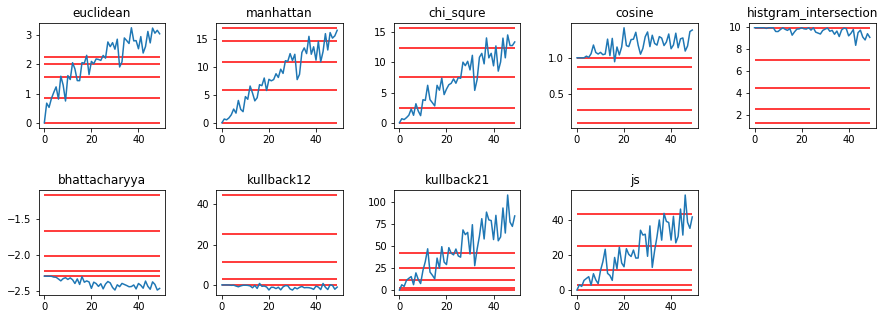

In [157]:
np.random.seed(100)
xs = np.linspace(-5.0, 5.0, 100)
y1 = norm.pdf(x=xs, loc=0, scale=1)

sl = 5
base_shift_vals = np.linspace(-3, 0, sl)
base_show_vals = base_shift_vals[np.linspace(0,sl - 1,5).astype(np.int)]
base_dists = {}
rcParams["figure.figsize"] = (15,5)
plt.plot(xs, y1,color = "r")
for si, shift_val in enumerate(base_shift_vals):
    y2 = norm.pdf(x=xs, loc=shift_val, scale=1)
    dist = calc_dists(y1, y2)
    for key in dist.keys():
        if key not in base_dists.keys():
            base_dists[key] = {}
        base_dists[key][shift_val] = dist[key]
    if shift_val in base_show_vals:
        plt.plot(xs, y2,color = "b")
plt.title("variation of nomral distribution(base)")
plt.show()
plt.pause(0.1)

sl = 50
shift_vals = np.arange(sl)
show_vals = shift_vals[np.linspace(0,sl - 1,5).astype(np.int)]
dists = {}
rcParams["figure.figsize"] = (15,5)
plt.plot(xs, y1,color = "r")
for si, shift_val in enumerate(shift_vals):
    y2 = norm.pdf(x=xs, loc=0, scale=1)
    for ni in range(shift_val):
        random_pos = np.random.random_integers(len(xs) - 1)
        y2[random_pos] = np.random.rand()
    dist = calc_dists(y1, y2)
    for key in dist.keys():
        if key not in dists.keys():
            dists[key] = []
        dists[key].append(dist[key])
    if shift_val in show_vals:
        plt.plot(xs, y2,color = "b")
plt.title("variation of nomral distribution")
plt.show()
plt.pause(0.1)

rcParams["figure.figsize"] = (15,5)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for ki, key in enumerate(dists.keys()):
    vals = dists[key]
    plt.subplot(2,5,ki + 1)
    plt.plot(shift_vals, vals)
    for kv in base_dists[key].keys():
        plt.hlines(base_dists[key][kv],min(shift_vals),max(shift_vals),color = "r")        
    plt.title(key)
plt.show()


[Pythonで標準正規分布のグラフを作成](https://qiita.com/toujika/items/485d1d6772efd87d7465)  
[Local Binary Patternと距離関数 - KNNを用いたMNISTの分類](http://kdog08.hatenablog.com/entry/2017/12/18/023534)  
[ヒストグラムインタセクションを用いたクラスタリングによる
マルチスペクトル画像の土地被覆分類](https://www.jstage.jst.go.jp/article/jsprs/49/5/49_5_320/_pdf)  
[【Day-23】機械学習で使う"距離"や"空間"をまとめてみた](https://www.procrasist.com/entry/23-distance)  
wassertainを実際にどうするかがよくわからん。  
[Wasserstein GAN/Towards Principled Methods for Training Generative Adversarial Networks](https://www.slideshare.net/DeepLearningJP2016/dlwasserstein-gantowards-principled-methods-for-training-generative-adversarial-networks)  
[Wasserstein GAN と Kantorovich-Rubinstein 双対性](https://qiita.com/mittyantest/items/0fdc9ce7624dbd2ee134)  
なるほど。。線形計画法をとかないと距離が出ないんだなー。

[コード](https://github.com/masashi2ueda/distance_check)